# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [4]:
# WRITE YOUR CODE HERE
#install.packages('glmnet')
library(glmnet)
library(tidyverse)

# suppress rank-deficient fit warnings (for readability)
options(warn = -1)

We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [5]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [7]:
# WRITE YOUR CODE HERE

# split data into 50 training and 51 test examples
x_train <- sample(x, 50)
names(x) <- seq_along(x)
train_inds <- as.integer(names(x_train))
x_test <- setdiff(x,x_train)
y_train <- y[train_inds]
y_test <- setdiff(y, y_train)

# create dataframes for training and test sets
df_train <- data.frame(x_train, y_train)
colnames(df_train) <- c('x','y')
df_test <- data.frame(x_test, y_test)
colnames(df_test) <- c('x','y')

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

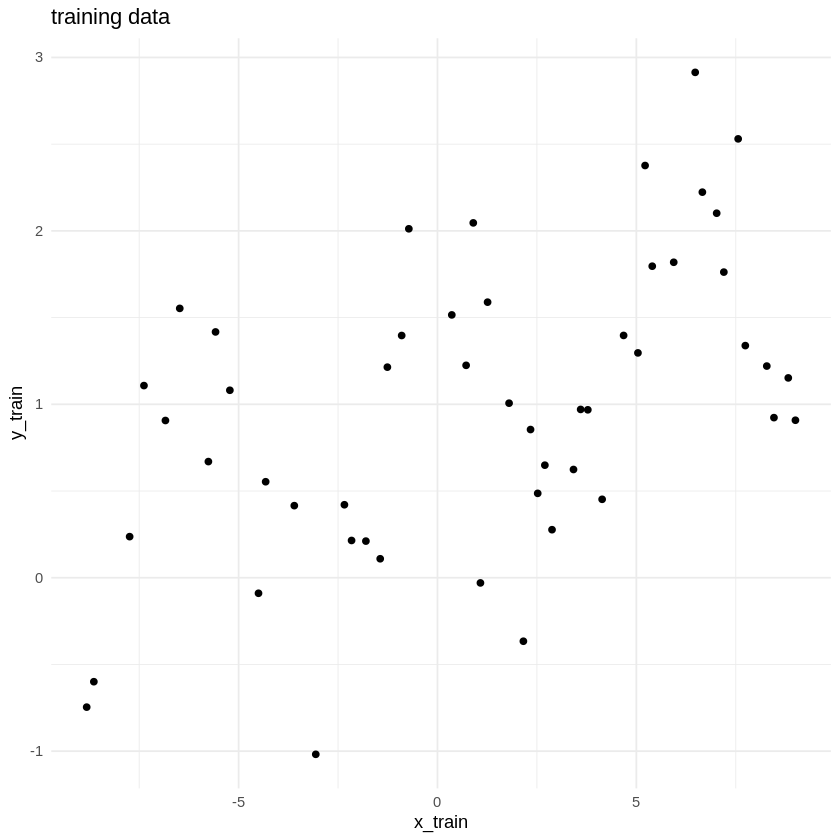

In [8]:
# WRITE YOUR CODE HERE
ggplot(data.frame(x_train ,y_train), aes(x_train, y_train)) + 
  geom_point() +
  theme_minimal() +
  labs(title='training data')

How would you describe the relationship between $x$ and $y$ based on this plot?

> While there seems to be a general trend towards a positive linear relationship between x_train and y_train, it is clear that the relationship is far more complex, mirroring the cosine function used to generate y.
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*


Call:
lm(formula = y ~ poly(x, 2), data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64794 -0.54050 -0.03966  0.59738  1.46142 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9819     0.1052   9.335 2.81e-12 ***
poly(x, 2)1   3.0254     0.7437   4.068  0.00018 ***
poly(x, 2)2   0.1875     0.7437   0.252  0.80208    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7437 on 47 degrees of freedom
Multiple R-squared:  0.2611,	Adjusted R-squared:  0.2297 
F-statistic: 8.305 on 2 and 47 DF,  p-value: 0.0008155


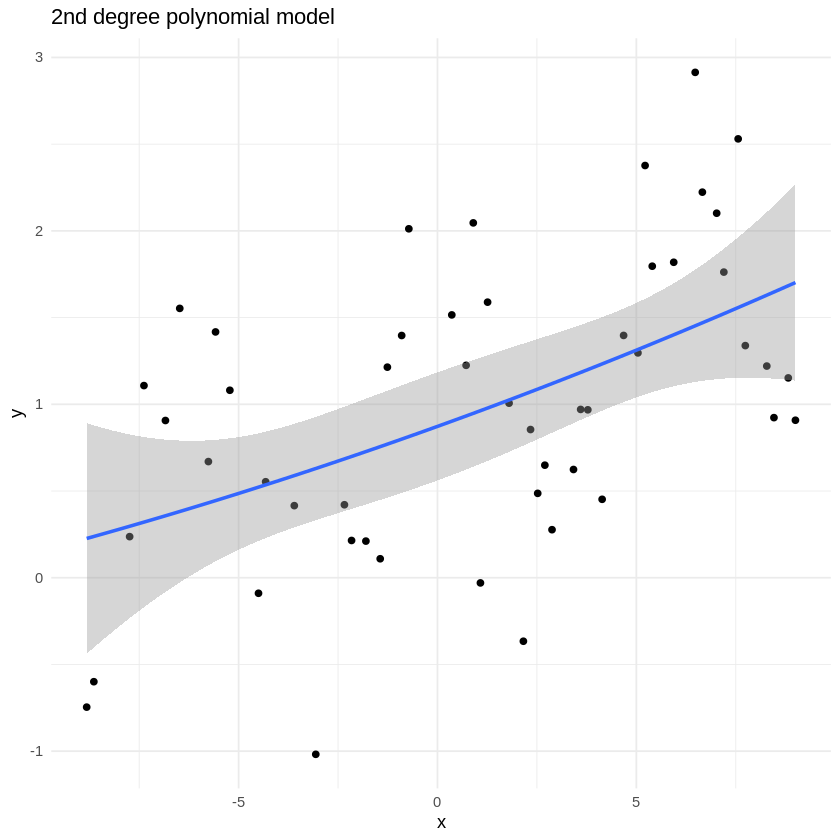

In [9]:
# WRITE YOUR CODE HERE

# fit 2nd degree polynomial model to training data
fit_2dp <- lm(y ~ poly(x, 2), data = df_train)
summary(fit_2dp)

# plot output
ggplot(df_train, aes(x, y)) +
  geom_point() +
  stat_smooth(method = 'lm', formula = y ~ poly(x,2)) +
  theme_minimal() +
  labs(title='2nd degree polynomial model')

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> The second degree polynomial model captures the general positive linear trend between x_train and y_train, but does not account for the distinct 'groups' of points, leading to a generally poor model fit.

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = y ~ poly(x, 12), data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25830 -0.24026  0.01139  0.28035  0.70891 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.98187    0.06967  14.093  < 2e-16 ***
poly(x, 12)1   3.02537    0.49266   6.141 4.05e-07 ***
poly(x, 12)2   0.18748    0.49266   0.381    0.706    
poly(x, 12)3   0.02150    0.49266   0.044    0.965    
poly(x, 12)4  -2.23523    0.49266  -4.537 5.84e-05 ***
poly(x, 12)5  -0.23314    0.49266  -0.473    0.639    
poly(x, 12)6  -2.16097    0.49266  -4.386 9.21e-05 ***
poly(x, 12)7   0.72668    0.49266   1.475    0.149    
poly(x, 12)8   2.40500    0.49266   4.882 2.03e-05 ***
poly(x, 12)9  -0.42857    0.49266  -0.870    0.390    
poly(x, 12)10 -0.72636    0.49266  -1.474    0.149    
poly(x, 12)11  0.33120    0.49266   0.672    0.506    
poly(x, 12)12  0.40486    0.49266   0.822    0.416    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

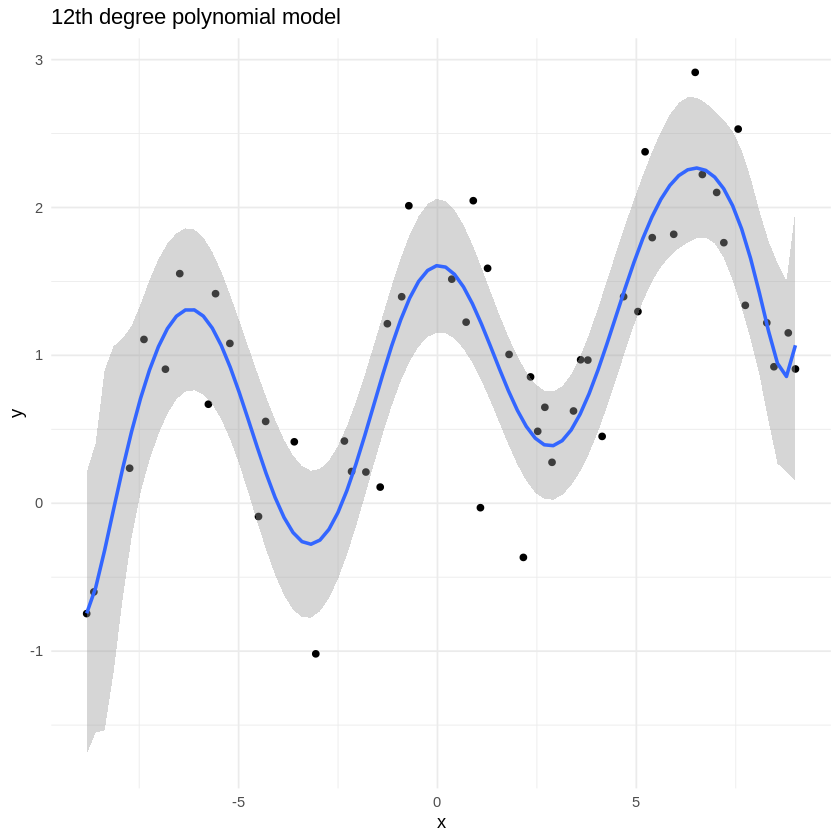

In [10]:
# WRITE YOUR CODE HERE
fit_12dp <- lm(y ~ poly(x, 12), data = df_train)
summary(fit_12dp)

# plot output
ggplot(df_train, aes(x, y)) +
  geom_point() +
  stat_smooth(method = 'lm', formula = y ~ poly(x,12)) + 
  theme_minimal() +
  labs(title='12th degree polynomial model')

> The 12th degree polynomial model is significantly more flexible than the 2nd degree model and is capable of capturing the complex relationship between x_train and y_train. This results in a much higher variance explained than what was observed in the second degree polynomial model.
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

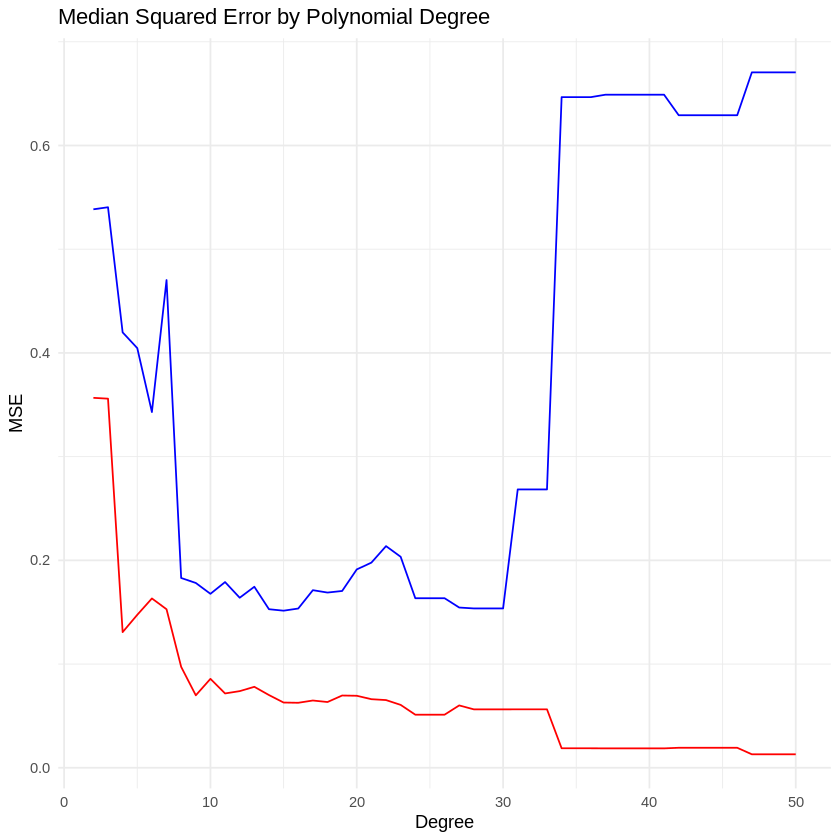

In [11]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

i <- 1

for (k in degree) {
    # WRITE YOUR CODE HERE
    fit_train <- lm(y_train ~ poly(x_train, k, raw = TRUE))
    preds <- predict(fit_train, newdata = data.frame(x_train = x_test))
    train_rss[i] <- median(resid(fit_train)^2) # Median squared error
    test_rss[i] <- median((preds - y_test)^2) # Median squared error
    i <- i + 1 # increment counter
}

# Plot your results here
# WRITE YOUR CODE HERE
df_for_plot <- data.frame(
  degree,
  train_rss,
  test_rss
)

ggplot(df_for_plot, aes(x=degree, y= test_rss)) +
  geom_line(color = 'blue') + 
  geom_line(aes(y= train_rss), color = 'red') +
  theme_minimal() +
  labs(title='Median Squared Error by Polynomial Degree', x = 'Degree', y='MSE')

What do you see as $k$ increase?

> As k increases, we see a general trend of reduced training median squared error, while the test set median squared error initially begins shrinking, but then balloons as we approach k=n. This is due to the increased variance of the model, which eventually fits every example at k=n. 
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



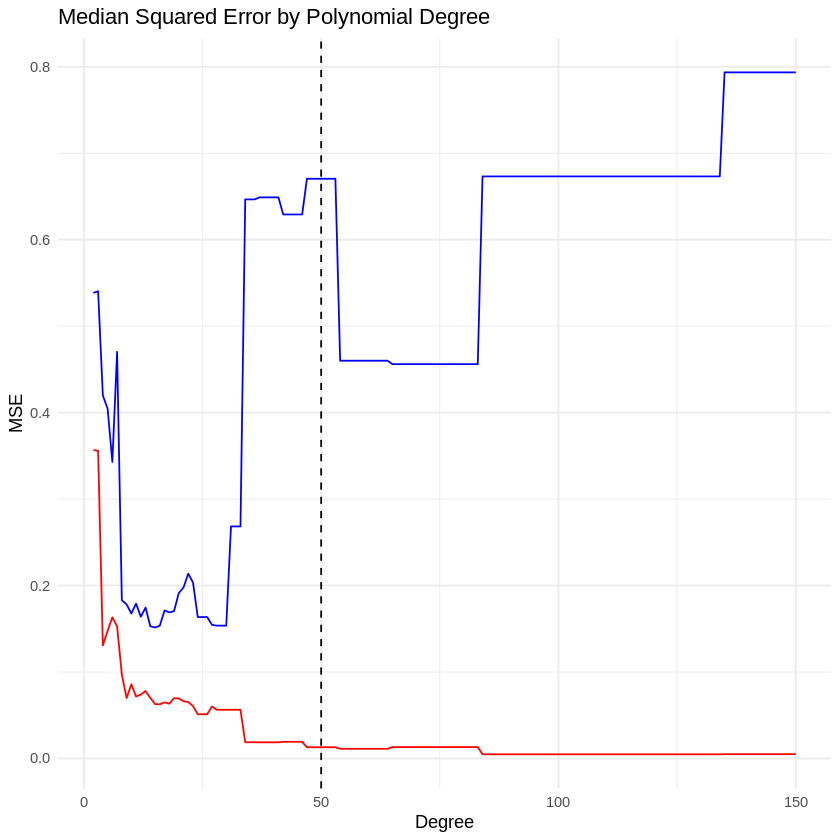

In [12]:
# WRITE YOUR CODE HERE
degree = seq(2,150)

# Need to setup your output vectors
rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

i <- 1
for (k in degree) {
    # WRITE YOUR CODE HERE
    fit_train <- lm(y_train ~ poly(x_train, k, raw = TRUE))
    preds <- predict(fit_train, newdata = data.frame(x_train = x_test))
    train_rss[i] <- median(resid(fit_train)^2) # Median squared error
    test_rss[i] <- median((preds - y_test)^2) # Median squared error
    i <- i + 1 # increment counter
}

# Plot your results here
# WRITE YOUR CODE HERE
df_for_plot <- data.frame(
  degree,
  train_rss,
  test_rss
)

ggplot(df_for_plot, aes(x=degree, y= test_rss)) +
  geom_line(color = 'blue') + 
  geom_line(aes(y= train_rss), color = 'red') +
  geom_vline(xintercept = length(x_train), linetype='dashed') +
  theme_minimal() +
  labs(title='Median Squared Error by Polynomial Degree', x = 'Degree', y='MSE')

What do you see as $k$ gets larger than $n$?

> With k > n, we begin to see increased test set median squared error. This is likely due to the fact that at k > n, we are no longer able to find a *unique* solution to the matrix equation Y = f(X). In general, we also see increasing test set MSE due to the model variance increasing until it fits every example at k = n. 
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

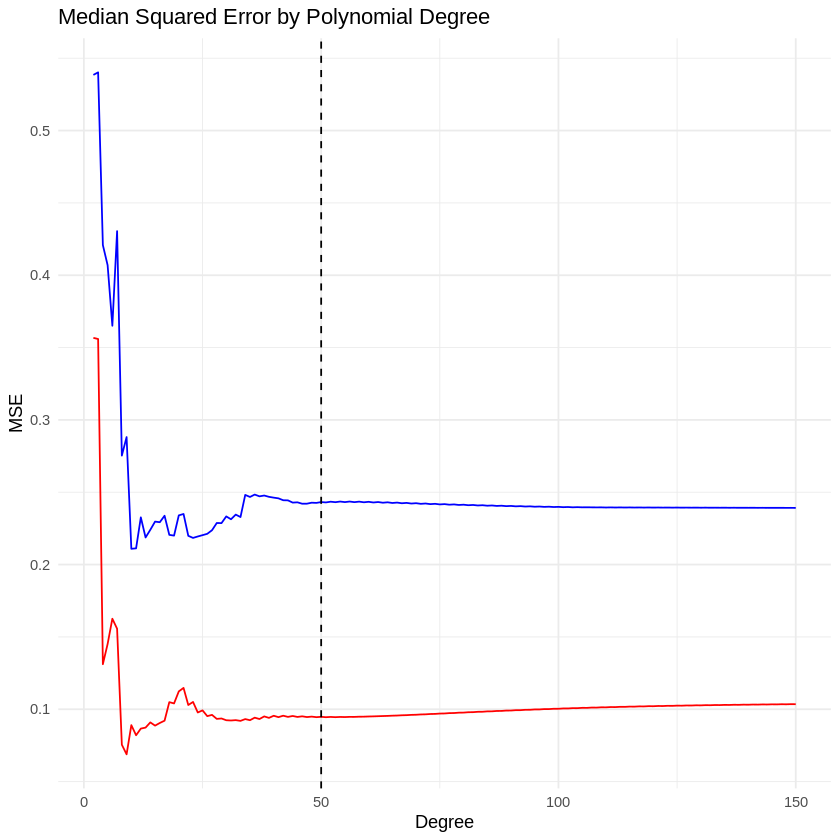

In [13]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

i <- 1

for (k in degree) {
    # WRITE YOUR CODE HERE
    fit_ridge <- glmnet(poly(x_train, k, raw = TRUE), y_train, alpha=0, lambda = lambda)
    train_preds <- predict(fit_ridge, poly(x_train, k, raw = TRUE), s = lambda)
    test_preds <- predict(fit_ridge, poly(x_test, k, raw = TRUE), s = lambda)
    train_rss[i] <- median((train_preds - y_train)^2) # Median squared error
    test_rss[i] <- median((test_preds - y_test)^2) # Median squared error
    i <- i + 1 # increment counter
}

# Plot your results here
# WRITE YOUR CODE HERE
df_for_plot <- data.frame(
  degree,
  train_rss,
  test_rss
)

ggplot(df_for_plot, aes(x=degree, y= test_rss)) +
  geom_line(color = 'blue') + 
  geom_line(aes(y= train_rss), color = 'red') +
  geom_vline(xintercept = length(x_train), linetype='dashed') +
  theme_minimal() +
  labs(title='Median Squared Error by Polynomial Degree', x = 'Degree', y='MSE')

What happens now when $k$ gets larger than $n$?

> With the ridge regression model, we see a markedly different pattern when k > n than observed in linear regression. We see that both the training and test set median squared error remains close to the value at k = n.
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> The results indicate that ridge regression prevents the rapid inflation of test set median squared error when k exceeds n (when there is no longer a unique solution to the equation Y = f(X). The near constant values for MSE after k exceeds n is due to the sparsity parameter lambda forcing weak beta values to 0. This helps address the issue of extremely high variance in the higher order polynomial models.
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> The p = n threshold for finding a *unique* solution to Y = F(X) can be visualized by examining the ordinary least squares solution. The 'optimal' derived solution to OLS is the single solution that minimizes the residual sum of squares. Ridge regression (and other forms of regularization) modifies the OLS solution with a sparsity constraint, which forces weak beta values towards 0. This ensures that regardless of p > n, the system Y = F(X) should still have a *unique* solution.

**DUE:** 5pm EST, April 12, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*